In [52]:
import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
os.chdir("C:/Users/ab/Documents/GitHub/data-science-lectures-monte/data")

In [ ]:
if (os.path.isfile('titanic-dataset.zip')):
    with zipfile.ZipFile("titanic-dataset.zip", 'r') as zip_ref:
        zip_ref.extractall("C:/Users/ab/Documents/GitHub/data-science-lectures-monte")
    os.remove(titanic-dataset.zip)

In [ ]:
train_df = pd.read_csv("titanic_train.csv")

In [71]:
train_df.head(25)

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",1,28.0,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",0,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",1,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",1,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",0,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0
5,1083,3,"Olsen, Mr. Henry Margido",0,28.0,0,0,C 4001,22.5250,NaN,S,NaN,173.0,NaN,0
6,898,3,"Johnson, Mr. William Cahoone Jr",0,19.0,0,0,LINE,0.0000,NaN,S,NaN,NaN,NaN,0
7,560,2,"Sinkkonen, Miss. Anna",1,30.0,0,0,250648,13.0000,NaN,S,10,NaN,"Finland / Washington, DC",1
8,1079,3,"Ohman, Miss. Velin",1,22.0,0,0,347085,7.7750,NaN,S,C,NaN,NaN,1
9,908,3,"Jussila, Miss. Mari Aina",1,21.0,1,0,4137,9.8250,NaN,S,NaN,NaN,NaN,0


In [70]:
print(train_df.columns)
train_df.describe()

Index(['passenger_id', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest',
       'survived'],
      dtype='object')


,passenger_id,pclass,age,sibsp,parch,fare,body,survived
count,850.000000,850.00000,850.000000,850.000000,850.000000,849.000000,73.000000,850.000000
mean,662.816471,2.32000,29.208726,0.522353,0.382353,34.012701,165.821918,0.368235
std,380.751936,0.83853,12.999023,1.112132,0.879511,53.705779,99.068487,0.482610
min,1.000000,1.00000,0.166700,0.000000,0.000000,0.000000,4.000000,0.000000
25%,332.250000,2.00000,22.000000,0.000000,0.000000,7.895800,75.000000,0.000000
50%,676.500000,3.00000,28.000000,0.000000,0.000000,14.108300,166.000000,0.000000
75%,992.250000,3.00000,34.875000,1.000000,0.000000,31.000000,260.000000,1.000000
max,1307.000000,3.00000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


In [72]:
# group the titles into x axis and the valued into y axis
# convert the values into dict so that it is ordered

x_axis = ["Didn't Survive", "Survive"]
survived = train_df["survived"].value_counts().to_dict()
y_axis = [survived[0], survived[1]]
print(x_axis, y_axis)

["Didn't Survive", 'Survive'] [537, 313]


## Visualization

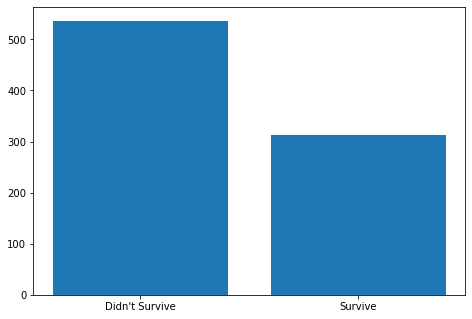

In [73]:
# graphing survived

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(x_axis, y_axis)
plt.show()

In [ ]:
# similar chart but for age of everyone, in histogram

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.hist(train_df['age'])
plt.show()

In [ ]:
# check age if survived

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.scatter(train_df['age'], train_df['survived'])
plt.show()

{'S': 589, 'C': 176, 'Q': 84}


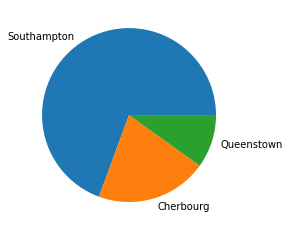

In [88]:
# check where embarked

labels = ["Southampton", "Cherbourg", "Queenstown"]
temp = train_df["embarked"].value_counts().to_dict()
print(temp)
embarked = [temp['S'], temp['C'], temp['Q']]
fig = plt.figure()
plt.pie(embarked, labels=labels)
plt.show()

## Linear Regression

In [ ]:
# fill in null values with the median

train_df['age'] = train_df["age"].fillna(train_df["age"].median())
train_df["age"].unique()

In [55]:
# train to see how age and survived correlate linearly

x_train = train_df["age"]
y_train = train_df["survived"]
x_train = x_train.to_numpy().reshape(-1, 1)
y_train = y_train.to_numpy().reshape(-1, 1)

reg = LinearRegression()
reg.fit(x_train, y_train)

print(reg.score(x_train, y_train))
print(r2_score(x_train, y_train))

0.001131552190376417
-4.932152993270887


In [65]:
###### doing the same thing except for mulitple linear regression

train_df.loc[train_df["sex"]=="male", "sex"] = 0
train_df.loc[train_df["sex"]=="female", "sex"] = 1

columns = ["age", "sex", "sibsp", "pclass"]

print(train_df["sex"].unique())

[1 0]


In [67]:
x_train = train_df[columns]
y_train = train_df["survived"]
y_train = y_train.to_numpy().reshape(-1, 1)

In [68]:
reg = LinearRegression()
reg.fit(x_train, y_train)
print(reg.score(x_train, y_train))

0.35296980036948655
